# ANÁLISIS DE COMPONENTES PRINCIPALES



In [251]:
# !pip install factor_analyzer

In [252]:
# pip install --upgrade factor_analyzer


## 0.Carga librerías


In [253]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer

## 1.Carga de datos

Base de datos Tiendas.xlsx

In [254]:
datos=pd.read_excel("Tiendas.xlsx")

In [255]:
datos.columns

Index(['Sexo', 'Tienda', 'Gente_joven', 'Innovadora', 'Tradicional',
       'Creativa', 'Exclusiva', 'Sexy', 'Moderna', 'Femenina', 'Marca_moda',
       'Lider', 'Open_Mind', 'Divertida', 'Cara', 'Masculina',
       'Despreoucupada', 'Elegante', 'Aburrida', 'Trato_informal', 'Original',
       'Barata', 'Calidad', 'Ropa_duradera', 'Calidad_precio', 'Garantia',
       'Vive_BCN', 'Edad',
       'Aunque_otra_marca_ofrezca_productos_parecidos_a_esta_yo_prefiero',
       'Puede_decirse_mucho_de_una_persona_si_utiliza_esta_marca',
       'Estoy_dispuesto_pagar_más_por_esta_marca',
       'Saber_si_una_persona_utiliza_esta_marca_me_dice_mucho',
       'Cuando_pienso_en_ropa_pienso_en_esta_marca',
       'Esta_marca_es_una_marca_valiosa_para_mi',
       'Utilizar_esta_marca_me_ayuda_a_expresar_mi_personalidad',
       'Preferencia_hacia_la_marca', 'Ingresos', 'Procede'],
      dtype='object')

## 2.Selección variables

Seleccionamos variables que usaremos para PCA

In [256]:
variables=['Gente_joven', 'Innovadora', 'Tradicional',
       'Creativa', 'Exclusiva', 'Sexy', 'Moderna', 'Femenina', 'Marca_moda',
       'Lider', 'Open_Mind', 'Divertida', 'Cara', 'Masculina',
       'Despreoucupada', 'Elegante', 'Aburrida', 'Trato_informal', 'Original',
       'Barata', 'Calidad', 'Ropa_duradera', 'Calidad_precio', 'Garantia']

In [257]:
datos_pca=datos.loc[:,variables]

In [258]:
datos_pca.sample(5)

,Gente_joven,Innovadora,Tradicional,Creativa,Exclusiva,Sexy,Moderna,Femenina,Marca_moda,Lider,...,Despreoucupada,Elegante,Aburrida,Trato_informal,Original,Barata,Calidad,Ropa_duradera,Calidad_precio,Garantia
376,4.0,2.0,5.0,3.0,4.0,5.0,3.0,2.0,2.0,3.0,...,1.0,4.0,2.0,2.0,2.0,2.0,5.0,5.0,4.0,4.0
36,3.0,3.0,5.0,2.0,4.0,3.0,4.0,5.0,4.0,4.0,...,1.0,5.0,2.0,1.0,4.0,2.0,5.0,5.0,5.0,4.0
310,3.0,2.0,4.0,3.0,3.0,2.0,4.0,3.0,4.0,4.0,...,1.0,4.0,3.0,3.0,2.0,3.0,4.0,4.0,4.0,4.0
688,1.0,2.0,5.0,3.0,4.0,4.0,2.0,5.0,3.0,2.0,...,1.0,5.0,5.0,1.0,4.0,1.0,3.0,3.0,3.0,3.0
23,5.0,3.0,1.0,2.0,1.0,1.0,2.0,5.0,2.0,3.0,...,4.0,1.0,2.0,5.0,2.0,5.0,1.0,1.0,1.0,1.0


In [259]:
datos_pca.shape

(753, 24)

## 3.Preprocesamos los datos (nulos, etc..)

Base de datos Tiendas.xlsx

In [260]:
datos_pca.isnull().sum()

Gente_joven        1
Innovadora         3
Tradicional        4
Creativa           6
Exclusiva          6
Sexy               3
Moderna            4
Femenina           7
Marca_moda        13
Lider              7
Open_Mind          9
Divertida          5
Cara               5
Masculina          8
Despreoucupada     5
Elegante           7
Aburrida           5
Trato_informal     7
Original           8
Barata             7
Calidad            5
Ropa_duradera      5
Calidad_precio     6
Garantia          10
dtype: int64

In [261]:
for i in datos_pca.columns:
  datos_pca[datos_pca[i].isnull()]=datos_pca[i].mean()

In [262]:
datos_pca.isnull().sum()

Gente_joven       0
Innovadora        0
Tradicional       0
Creativa          0
Exclusiva         0
Sexy              0
Moderna           0
Femenina          0
Marca_moda        0
Lider             0
Open_Mind         0
Divertida         0
Cara              0
Masculina         0
Despreoucupada    0
Elegante          0
Aburrida          0
Trato_informal    0
Original          0
Barata            0
Calidad           0
Ropa_duradera     0
Calidad_precio    0
Garantia          0
dtype: int64

## 4.Miramos correlaciones para ver la idoneidad de la técnica



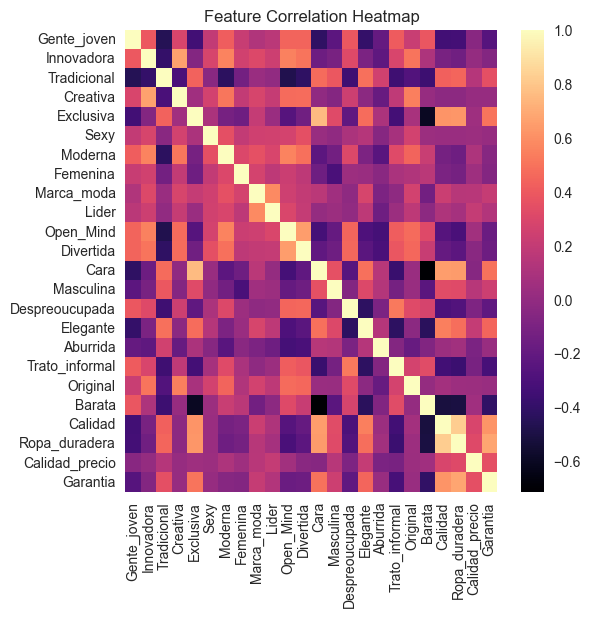

[[ 1.          0.39626094 -0.45928747  0.28839647 -0.34025957  0.19410273
   0.4159947   0.21266459  0.11787161  0.1585913   0.44232849  0.43873647
  -0.41500378 -0.23208818  0.38926388 -0.39275534 -0.19199578  0.40755063
   0.22175378  0.37920439 -0.33915856 -0.3362436  -0.04881027 -0.26123782]
 [ 0.39626094  1.         -0.39766208  0.66299112 -0.06591513  0.28232248
   0.55503486  0.25305524  0.30964057  0.23427338  0.54626781  0.50110059
  -0.15893359 -0.11261331  0.3166476  -0.1016397  -0.22313342  0.28451799
   0.50296322  0.10816837 -0.1156335  -0.15022927  0.00531618 -0.07004357]
 [-0.45928747 -0.39766208  1.         -0.30596169  0.43308809 -0.04302297
  -0.43036503 -0.13254472  0.02796583 -0.00794712 -0.47917356 -0.41759236
   0.46964423  0.38592234 -0.3562926   0.4894169   0.25647469 -0.35345789
  -0.27480148 -0.3641093   0.42659439  0.44716614  0.13841     0.34778852]
 [ 0.28839647  0.66299112 -0.30596169  1.          0.05360973  0.25936917
   0.5062318   0.19031585  0.283472

In [263]:
# Ver correlaciones
import seaborn as sns
import matplotlib.pyplot as plt
# create covariance matrix
corr_matrix = np.corrcoef(datos_pca.T)

# create heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(corr_matrix, cmap='magma', annot=False, fmt='.2f',xticklabels=datos_pca.columns, yticklabels=datos_pca.columns)

# set plot title
plt.title('Feature Correlation Heatmap')

# show plot
plt.show()
print(corr_matrix)

## 5.Aplicamos la técnica a las variables seleccionadas


In [264]:
# Calcular PCA y entrenar el modelo
#pca_tiendas_rot = FactorAnalyzer(rotation="varimax", n_factors=6, method='principal')
numero_componentes=7
pca_tiendas_rot = FactorAnalyzer(rotation="varimax",n_factors=numero_componentes, method='principal')
pca_tiendas_rot.fit(datos_pca)

FactorAnalyzer(method='principal', n_factors=7, rotation='varimax',
               rotation_kwargs={})

## 6.Vemos las diferentes cosas que nos interesan


### 6.1.Varianza explicada

Vemos lo que explica cada componente de la información original

In [265]:
# Varianza explicada

pca_varianzas = pd.DataFrame({'Absoluto': pca_tiendas_rot.get_eigenvalues()[0],
                              '%': 100*pca_tiendas_rot.get_eigenvalues()[0]/sum(pca_tiendas_rot.get_eigenvalues()[0])})
pca_varianzas['Acumulado']=pca_varianzas['%']
for i in range(1,pca_varianzas.shape[0]):
  pca_varianzas.iloc[i,2]=pca_varianzas.iloc[i-1,2]+pca_varianzas.iloc[i,1]


pca_varianzas

,Absoluto,%,Acumulado
0,6.862959,28.595661,28.595661
1,4.096685,17.069521,45.665182
2,1.629211,6.788381,52.453563
3,1.286936,5.362234,57.815798
4,1.119829,4.665952,62.481750
5,0.946725,3.944688,66.426437
6,0.843274,3.513641,69.940079
7,0.822739,3.428078,73.368157
8,0.656670,2.736126,76.104283
9,0.591027,2.462612,78.566895


### 6.2.Comunalidades

Vemos lo que explican las componentes retenidas de cada variable original

In [266]:
# comunalidades
pca_comunalidades = pd.DataFrame(data = 100*pca_tiendas_rot.get_communalities(),columns=['Comunalidad'],index=variables)
pca_comunalidades

,Comunalidad
Gente_joven,50.926577
Innovadora,65.665083
Tradicional,63.897117
Creativa,66.285870
Exclusiva,73.417953
Sexy,56.949867
Moderna,62.631242
Femenina,73.118122
Marca_moda,76.329664
Lider,80.310947


### 6.3.Matriz de Saturaciones

Vemos la matriz de saturaciones de donde podremos extraer lo que significac cada variable (poner los nombres)

In [267]:
# Ver lamatriz de saturaciones
names = [f"C{i+1}" for i in range(numero_componentes)]
pca_saturaciones = pd.DataFrame(data = pca_tiendas_rot.loadings_,columns=names,index=variables)
pca_saturaciones

,C1,C2,C3,C4,C5,C6,C7
Gente_joven,-0.359457,0.356033,0.162448,0.024361,-0.200826,-0.075172,0.424655
Innovadora,-0.051788,0.776645,0.105617,-0.031058,-0.138205,-0.073061,0.119303
Tradicional,0.412393,-0.399494,0.116337,0.112137,0.274495,0.362018,-0.277118
Creativa,0.081872,0.799845,0.021422,-0.051455,-0.083262,-0.076072,0.024046
Exclusiva,0.813333,0.055240,0.028154,-0.097615,0.151499,0.106738,-0.157958
Sexy,-0.067590,0.583221,0.201806,0.027058,0.076451,0.358748,-0.220862
Moderna,-0.144087,0.687858,0.229459,0.150346,-0.180363,-0.036795,0.152521
Femenina,-0.101322,0.230719,0.227029,0.092425,-0.733033,0.261921,-0.040746
Marca_moda,0.224530,0.267062,0.790034,0.026597,-0.124793,0.024509,-0.022946
Lider,0.018678,0.166262,0.869482,0.105930,0.018768,-0.086716,-0.005060


## 7.Nuevos datos

Generamos (transform) los nuevos datos

### 7.1.Cálculo de los nuevos datos


In [268]:
# Nuevos datos
# Para ver las nuevas puntuaciones en las componentes
principalComponents=pca_tiendas_rot.transform(datos_pca)
principalComponents
nuevos_datos = pd.DataFrame(data = principalComponents,columns=names)
nuevos_datos

,C1,C2,C3,C4,C5,C6,C7
0,-0.479205,0.296653,1.334548,0.263203,0.252665,-0.393198,-0.986877
1,-0.031272,0.074559,0.489558,0.470746,0.269696,-1.574151,-0.133702
2,-0.979119,0.616332,1.690422,0.947488,0.208021,0.646978,-0.028332
3,0.237806,0.495179,1.484005,0.817049,-0.659850,-0.794239,-0.116882
4,-0.566055,2.075395,1.190384,0.512948,0.474291,0.126849,0.164680
...,...,...,...,...,...,...,...
748,0.124585,-0.242506,0.366198,-0.229133,0.187017,-1.051262,-1.159332
749,-2.262332,-0.172773,-0.248266,0.385291,1.526621,-1.475550,-1.974096
750,-0.649803,0.174659,-0.288173,-0.425457,-1.574966,0.480750,0.807709
751,1.905823,2.079455,-0.645291,0.253798,-1.877461,2.102217,2.057258


### 7.2.Poner los nombres correctos


In [269]:
nuevos_datos.columns=['Lujo_C','Fashion_C','Líder_C','Calidad_Precio_C','Masculina_C','Aburrida_C','Informal_C']

In [270]:
nuevos_datos

,Lujo_C,Fashion_C,Líder_C,Calidad_Precio_C,Masculina_C,Aburrida_C,Informal_C
0,-0.479205,0.296653,1.334548,0.263203,0.252665,-0.393198,-0.986877
1,-0.031272,0.074559,0.489558,0.470746,0.269696,-1.574151,-0.133702
2,-0.979119,0.616332,1.690422,0.947488,0.208021,0.646978,-0.028332
3,0.237806,0.495179,1.484005,0.817049,-0.659850,-0.794239,-0.116882
4,-0.566055,2.075395,1.190384,0.512948,0.474291,0.126849,0.164680
...,...,...,...,...,...,...,...
748,0.124585,-0.242506,0.366198,-0.229133,0.187017,-1.051262,-1.159332
749,-2.262332,-0.172773,-0.248266,0.385291,1.526621,-1.475550,-1.974096
750,-0.649803,0.174659,-0.288173,-0.425457,-1.574966,0.480750,0.807709
751,1.905823,2.079455,-0.645291,0.253798,-1.877461,2.102217,2.057258


### 7.3.Obtener la matriz original con los nuevos datos transformados


In [271]:
nuevos_datos.reset_index(drop=True, inplace=True)
datos.reset_index(drop=True, inplace=True)
df=pd.concat([datos,nuevos_datos],axis=1)

In [272]:
df.sample(5)

,Sexo,Tienda,Gente_joven,Innovadora,Tradicional,Creativa,Exclusiva,Sexy,Moderna,Femenina,...,Preferencia_hacia_la_marca,Ingresos,Procede,Lujo_C,Fashion_C,Líder_C,Calidad_Precio_C,Masculina_C,Aburrida_C,Informal_C
199,Hombre,Ralp Lauren,2.0,2.0,4.0,2.0,3.0,1.0,2.0,1.0,...,8.0,NaN,Escuela privada,0.669324,-1.672328,-0.128704,-0.624983,1.424531,-0.646068,-0.313106
272,Mujer,Levi´s,5.0,5.0,3.0,4.0,4.0,5.0,3.0,4.0,...,0.0,Más de 7500€,Escuela pública,0.921356,0.937919,0.653469,1.010221,0.356746,0.626506,2.222467
274,Mujer,Massimo Dutti,2.0,3.0,4.0,2.0,3.0,3.0,3.0,4.0,...,0.0,NaN,Escuela privada,0.909170,-0.533136,-0.789274,1.480012,-0.233148,1.385669,-1.165622
10,Hombre,H&M,5.0,5.0,1.0,5.0,1.0,3.0,5.0,1.0,...,0.0,Más de 7500€,Escuela privada,-1.267144,1.745535,0.018480,0.920459,1.522780,-1.965762,0.221744
626,Mujer,H&M,5.0,2.0,2.0,2.0,1.0,2.0,3.0,2.0,...,0.0,Entre 4001 y 5000€,Escuela pública,-1.696961,-1.103338,-0.709042,-0.958542,0.647062,-0.174630,0.707029


## 8. Uso en este caso concreto de las componentes obtenidas


### 8.1.Ver las medias de cada Tienda en los 7 componentes


In [273]:
perfiles=df.groupby('Tienda')[nuevos_datos.columns].mean()
perfiles['Tienda']=perfiles.index

In [274]:
perfiles

,Lujo_C,Fashion_C,Líder_C,Calidad_Precio_C,Masculina_C,Aburrida_C,Informal_C,Tienda
Tienda,,,,,,,,
Adolfo Dominguez,0.595786,0.023045,-0.499842,-0.134250,-0.081369,0.396577,-0.415949,Adolfo Dominguez
Bershka,-0.805239,0.183696,0.187933,-0.592512,-0.119448,0.067934,0.385774,Bershka
Burberrys,1.151095,-0.615578,0.113097,-0.334369,-0.070748,0.307682,-0.521966,Burberrys
Cortefiel,0.153571,-1.032978,-0.795824,-0.016728,-0.269594,0.621012,-0.509142,Cortefiel
Custo,0.918655,1.511341,-0.393142,-0.765011,-0.962441,-0.079462,0.620014,Custo
Desigual,0.611252,0.976168,-0.725149,-0.812483,-0.417233,-1.084632,0.930362,Desigual
Furest,0.938650,-0.382200,-0.027672,-0.169864,1.144739,0.077473,-0.438560,Furest
H&M,-0.824792,0.190714,-0.170888,-0.226553,-0.400475,-0.091073,0.375591,H&M
Levi´s,0.587640,-0.342879,0.318060,0.263185,0.636878,-0.037819,0.797260,Levi´s


### 8.2.Ver las Tiendas en un mapa conceptual de 2 de las 6 componentes

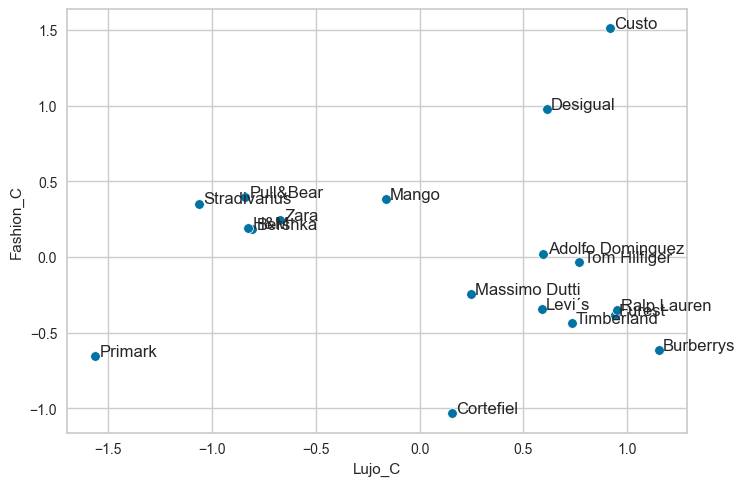

In [275]:
sns.scatterplot(data=perfiles,x='Lujo_C',y='Fashion_C',legend=True)

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(perfiles.Lujo_C, perfiles.Fashion_C, perfiles.Tienda, plt.gca())


In [276]:
perfiles

,Lujo_C,Fashion_C,Líder_C,Calidad_Precio_C,Masculina_C,Aburrida_C,Informal_C,Tienda
Tienda,,,,,,,,
Adolfo Dominguez,0.595786,0.023045,-0.499842,-0.134250,-0.081369,0.396577,-0.415949,Adolfo Dominguez
Bershka,-0.805239,0.183696,0.187933,-0.592512,-0.119448,0.067934,0.385774,Bershka
Burberrys,1.151095,-0.615578,0.113097,-0.334369,-0.070748,0.307682,-0.521966,Burberrys
Cortefiel,0.153571,-1.032978,-0.795824,-0.016728,-0.269594,0.621012,-0.509142,Cortefiel
Custo,0.918655,1.511341,-0.393142,-0.765011,-0.962441,-0.079462,0.620014,Custo
Desigual,0.611252,0.976168,-0.725149,-0.812483,-0.417233,-1.084632,0.930362,Desigual
Furest,0.938650,-0.382200,-0.027672,-0.169864,1.144739,0.077473,-0.438560,Furest
H&M,-0.824792,0.190714,-0.170888,-0.226553,-0.400475,-0.091073,0.375591,H&M
Levi´s,0.587640,-0.342879,0.318060,0.263185,0.636878,-0.037819,0.797260,Levi´s


### 8.3.Cluster de tiendas


In [277]:
kmeans.get_params()

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 3,
 'n_init': 10,
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

In [278]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

perfiles_cluster=perfiles.drop(columns='Tienda', inplace=False)
numero_clusters = 3
kmeans = KMeans(n_clusters=numero_clusters, random_state=42,n_init= 10)
clusters = kmeans.fit_predict(perfiles_cluster)
# Agregar la columna de clusters al DataFrame original
perfiles['Cluster'] = clusters
perfiles

,Lujo_C,Fashion_C,Líder_C,Calidad_Precio_C,Masculina_C,Aburrida_C,Informal_C,Tienda,Cluster
Tienda,,,,,,,,,
Adolfo Dominguez,0.595786,0.023045,-0.499842,-0.134250,-0.081369,0.396577,-0.415949,Adolfo Dominguez,0
Bershka,-0.805239,0.183696,0.187933,-0.592512,-0.119448,0.067934,0.385774,Bershka,1
Burberrys,1.151095,-0.615578,0.113097,-0.334369,-0.070748,0.307682,-0.521966,Burberrys,0
Cortefiel,0.153571,-1.032978,-0.795824,-0.016728,-0.269594,0.621012,-0.509142,Cortefiel,0
Custo,0.918655,1.511341,-0.393142,-0.765011,-0.962441,-0.079462,0.620014,Custo,2
Desigual,0.611252,0.976168,-0.725149,-0.812483,-0.417233,-1.084632,0.930362,Desigual,2
Furest,0.938650,-0.382200,-0.027672,-0.169864,1.144739,0.077473,-0.438560,Furest,0
H&M,-0.824792,0.190714,-0.170888,-0.226553,-0.400475,-0.091073,0.375591,H&M,1
Levi´s,0.587640,-0.342879,0.318060,0.263185,0.636878,-0.037819,0.797260,Levi´s,0


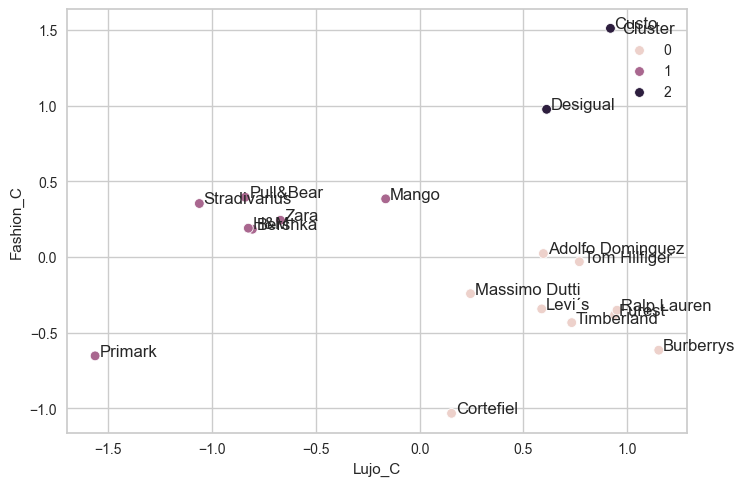

In [279]:
sns.scatterplot(data=perfiles,x='Lujo_C',y='Fashion_C',hue='Cluster')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']))

label_point(perfiles.Lujo_C, perfiles.Fashion_C, perfiles.Tienda, plt.gca())

## EJERCICIO EXTRA

In [281]:
perfiles = df.groupby(['Sexo','Procede'])[nuevos_datos.columns].mean()
perfiles

Lujo_C  Fashion_C   Líder_C  Calidad_Precio_C  \
Sexo   Procede                                                            
Hombre Ambas            0.127601   0.326638 -0.077615          0.025887   
       Escuela privada  0.085183  -0.076211  0.010633          0.038750   
       Escuela pública -0.191980  -0.082154 -0.345504         -0.074558   
Mujer  Ambas           -0.055536   0.054845 -0.234448          0.122558   
       Escuela privada -0.058664  -0.028561  0.141157         -0.044538   
       Escuela pública  0.049905   0.031048  0.036360         -0.120620   

                        Masculina_C  Aburrida_C  Informal_C  
Sexo   Procede                                               
Hombre Ambas               0.459146   -0.195327   -0.158781  
       Escuela privada     0.457866   -0.074897    0.021571  
       Escuela pública     0.253750   -0.053577   -0.110962  
Mujer  Ambas              -0.472869   -0.082889   -0.300197  
       Escuela privada    -0.335573    0.081941    0.027908  
       Escuela pública    -0.175990    0.134954    0.410399